In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Load Dataset

In [2]:
dataset=pd.read_csv("./cardio_train.csv",delimiter=';')
dataset.shape




(70000, 13)

Train Test Split

In [3]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X = dataset.drop(columns=['cardio'])
y = dataset['cardio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the training, validation, and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (44800, 12)
Shape of X_val: (11200, 12)
Shape of X_test: (14000, 12)
Shape of y_train: (44800,)
Shape of y_val: (11200,)
Shape of y_test: (14000,)


Define Model

In [4]:

from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [5]:
rf=RandomForestClassifier(criterion='entropy', max_features='sqrt')
dt= DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, splitter='random')
gb=GradientBoostingClassifier(max_depth=4, min_samples_leaf=20)
gnb=GaussianNB(var_smoothing=0.004328761281083057)
svm=SVC(C=100, gamma='auto', probability=True)
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')



lr=LogisticRegression(C=0.615848211066026, max_iter=500, penalty='l1', solver='liblinear')

<h2 style="Color:Red"> Stack 1

In [6]:


# Create a StackingClassifier with base classifiers clf1, clf2, clf3, and clf4, and meta-classifier lr
sclf1 = StackingClassifier(
    estimators=[('clf1', rf), ('clf2', dt), ('clf3', gb), ('clf4', gnb)],
    final_estimator=lr
)

In [7]:


# Fit the Stacking Classifier to the training data
sclf1.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf1, lr)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train1 = pipeline[:-1].transform(X_train)

# Now you can inspect the transformed training data
# For example, you can print the first few rows
print(transformed_X_train1[:5])  # Print the first 5 rows

# Optionally, you can perform further analysis or visualization on this transformed data
# For example, you can plot histograms or scatter plots to explore the distribution of features


[[0.28       0.49062279 0.85141147 0.54033087]
 [0.29       0.42477876 0.45870943 0.36002671]
 [0.7        0.49062279 0.36552294 0.55420754]
 [0.74       0.49062279 0.3597024  0.54312585]
 [0.93       0.60544218 0.6344803  0.59466981]]


In [8]:
transformed_X_train1.shape

(44800, 4)

In [9]:
def calculate_false_negative(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp) * 100

Validation Accuracy 

Accuracy for stack 1(Validation): 
Validation Accuracy: 0.7369
Validation Precision: 0.7388
Validation Recall: 0.7369
Validation F1 Score: 0.7365


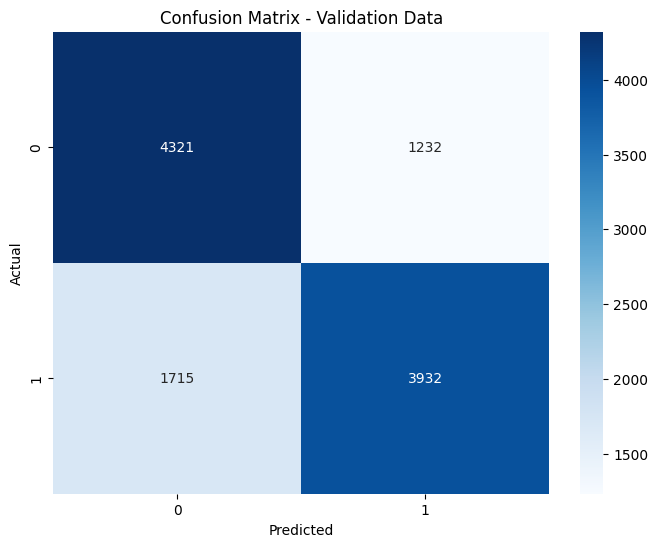

False Negative Percentage for Validation Data: 30.37%


In [10]:


# Define the function to calculate false negative percentage


# Assuming you have defined the necessary variables and models

print("Accuracy for stack 1(Validation): ")

# Make predictions on the validation set
val_predictions1 = sclf1.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions1)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions1, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions1, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions1, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
cm = confusion_matrix(y_val, val_predictions1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions1)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


Test Accuracy

Accuracy for stack 1(Test): 
Test Accuracy: 0.7369
Test Precision: 0.7378
Test Recall: 0.7369
Test F1 Score: 0.7366


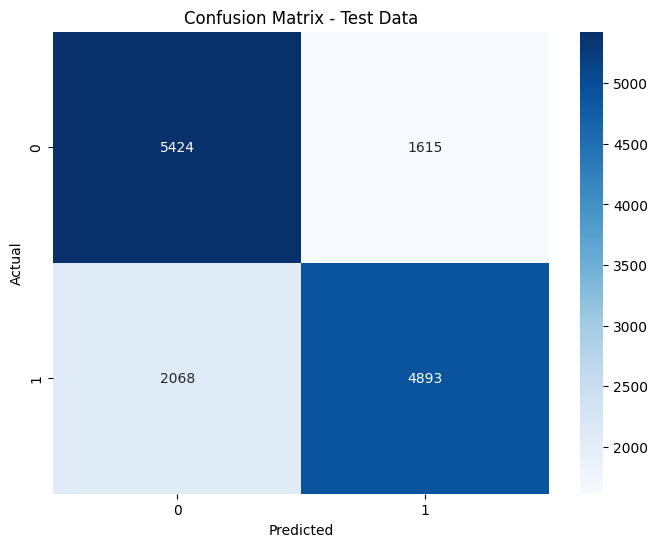

False Negative Percentage for Test Data: 29.71%


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy for stack 1(Test): ")

# Make predictions on the test set
test_predictions1 = sclf1.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions1)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions1, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions1, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions1, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, test_predictions1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Test Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions1)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")


<h2 style="Color:Red"> Stack 2

In [12]:


# Create a StackingClassifier with base classifiers clf1, clf2, clf3, and clf4, and meta-classifier lr
sclf2 = StackingClassifier(
    estimators=[('clf1', dt), ('clf2', gb), ('clf3', svm), ('clf4', knn)],
    final_estimator=lr
)

In [13]:

# Fit the Stacking Classifier to the training data
sclf2.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf2, lr)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train2 = pipeline[:-1].transform(X_train)

# Now you can inspect the transformed training data
# For example, you can print the first few rows
print(transformed_X_train2[:5])  # Print the first 5 rows

# Optionally, you can perform further analysis or visualization on this transformed data
# For example, you can plot histograms or scatter plots to explore the distribution of features


[[5.45963229e-01 8.51411468e-01 9.99999960e-01 0.00000000e+00]
 [6.06373008e-01 4.58709434e-01 9.99999960e-01 0.00000000e+00]
 [5.45963229e-01 3.65522937e-01 1.12750455e-04 1.00000000e+00]
 [5.45963229e-01 3.59702397e-01 1.12725862e-04 1.00000000e+00]
 [5.45963229e-01 6.34480298e-01 1.12735538e-04 1.00000000e+00]]


Accuracy for stack 2(Validation): 
Validation Accuracy: 0.7379
Validation Precision: 0.7400
Validation Recall: 0.7379
Validation F1 Score: 0.7375


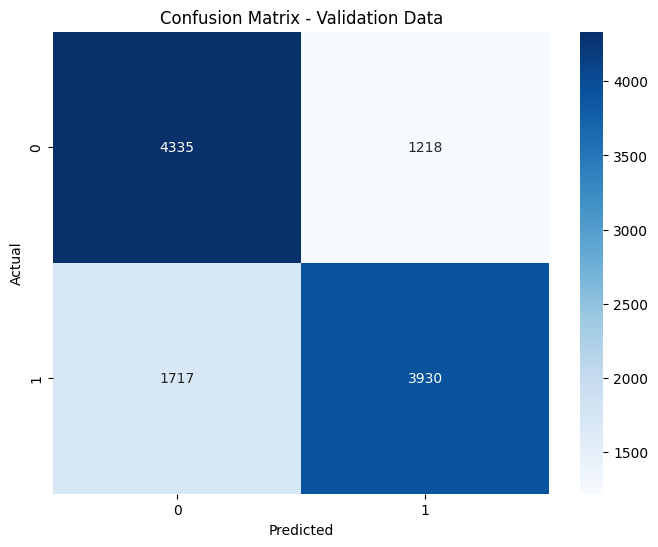

False Negative Percentage for Validation Data: 30.41%


In [14]:
print("Accuracy for stack 2(Validation): ")

# Make predictions on the validation set
val_predictions2 = sclf2.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions2)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions2, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions2, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions2, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
cm = confusion_matrix(y_val, val_predictions2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions2)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


Accuracy for stack 2(Test): 


Test Accuracy: 0.7362
Test Precision: 0.7371
Test Recall: 0.7362
Test F1 Score: 0.7359


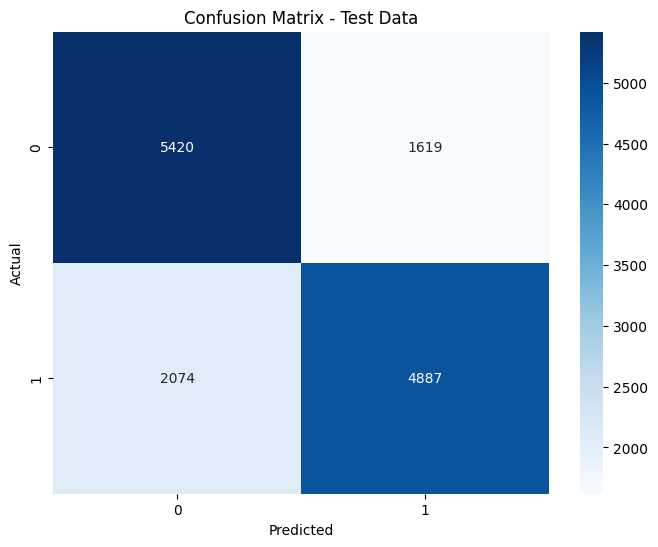

False Negative Percentage for Test Data: 29.79%


In [15]:
print("Accuracy for stack 2(Test): ")

# Make predictions on the test set
test_predictions2 = sclf2.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions2)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions2, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions2, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions2, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, test_predictions2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Test Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions2)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")


<h2 style="Color:Red"> Stack 3

In [16]:
sclf3 = StackingClassifier(
    estimators=[('clf1', rf), ('clf2', knn), ('clf3', dt), ('clf4', gb)],
    final_estimator=lr
)

In [17]:

# Fit the Stacking Classifier to the training data
sclf3.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf3, lr)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train3 = pipeline[:-1].transform(X_train)

# Now you can inspect the transformed training data
# For example, you can print the first few rows
print(transformed_X_train3[:5])  # Print the first 5 rows

# Optionally, you can perform further analysis or visualization on this transformed data
# For example, you can plot histograms or scatter plots to explore the distribution of features


[[0.37       0.         0.37655566 0.85141147]
 [0.21       0.         0.62890462 0.45870943]
 [0.75       1.         0.37655566 0.36552294]
 [0.7        1.         0.37655566 0.3597024 ]
 [0.94       1.         0.6460893  0.6344803 ]]


Accuracy for stack 3(Validation): 
Validation Accuracy: 0.7368
Validation Precision: 0.7389
Validation Recall: 0.7368
Validation F1 Score: 0.7364


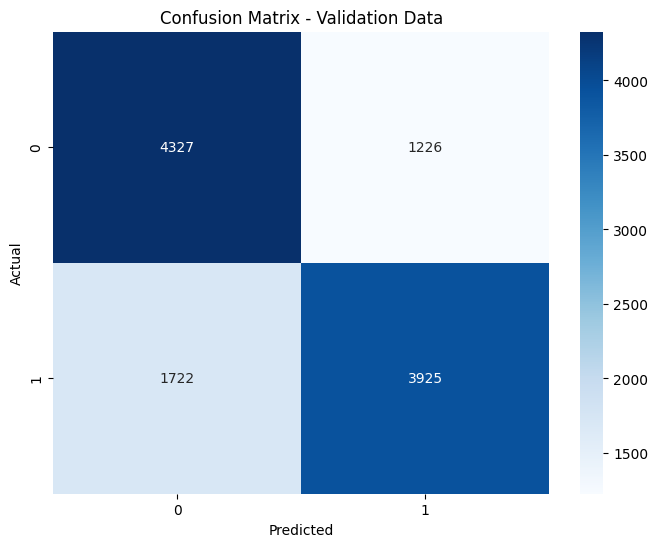

False Negative Percentage for Validation Data: 30.49%


In [18]:
print("Accuracy for stack 3(Validation): ")

# Make predictions on the validation set
val_predictions3 = sclf3.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions3)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions3, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions3, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions3, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
cm = confusion_matrix(y_val, val_predictions3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions3)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


Accuracy for stack 3(Test): 
Test Accuracy: 0.7368
Test Precision: 0.7377
Test Recall: 0.7368
Test F1 Score: 0.7365


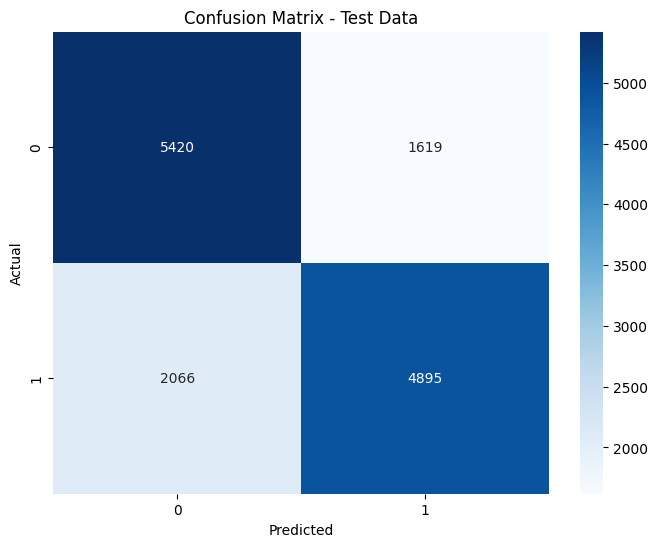

False Negative Percentage for Test Data: 29.68%


In [19]:
print("Accuracy for stack 3(Test): ")

# Make predictions on the test set
test_predictions3 = sclf3.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions3)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions3, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions3, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions3, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, test_predictions3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Test Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions3)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")


<h2 style="Color:Red"> Stack 4

In [20]:
sclf4 = StackingClassifier(
    estimators=[('clf1', dt), ('clf2', gb), ('clf3', lr), ('clf4', svm)],
    final_estimator=lr
)

In [21]:

# Fit the Stacking Classifier to the training data
sclf4.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf4, lr)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train4 = pipeline[:-1].transform(X_train)

# Now you can inspect the transformed training data
# For example, you can print the first few rows
print(transformed_X_train4[:5])  # Print the first 5 rows

# Optionally, you can perform further analysis or visualization on this transformed data
# For example, you can plot histograms or scatter plots to explore the distribution of features


[[0.43197662 0.85141147 0.75074675 0.99999542]
 [0.49559256 0.45870943 0.48849077 0.99999542]
 [0.43197662 0.36552294 0.42930162 0.00121181]
 [0.43197662 0.3597024  0.40969168 0.00121162]
 [0.64827935 0.6344803  0.55377047 0.00121169]]


Accuracy for stack 4(Validation): 


Validation Accuracy: 0.7377
Validation Precision: 0.7397
Validation Recall: 0.7377
Validation F1 Score: 0.7373


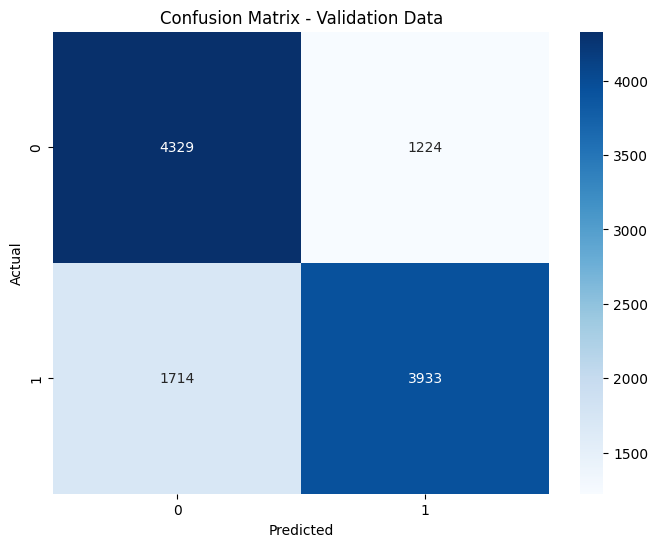

False Negative Percentage for Validation Data: 30.35%


In [22]:
print("Accuracy for stack 4(Validation): ")

# Make predictions on the validation set
val_predictions4 = sclf4.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions4)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions4, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions4, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions4, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
cm = confusion_matrix(y_val, val_predictions4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions4)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


Accuracy for stack 4(Test): 


Test Accuracy: 0.7364
Test Precision: 0.7373
Test Recall: 0.7364
Test F1 Score: 0.7361


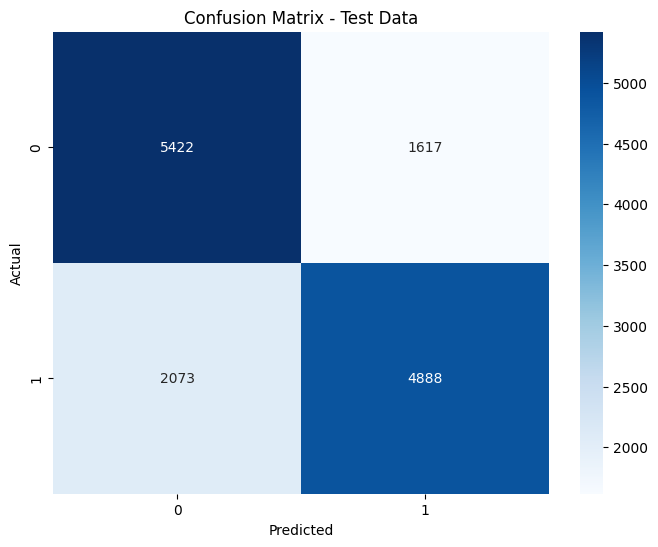

False Negative Percentage for Test Data: 29.78%


In [23]:
print("Accuracy for stack 4(Test): ")

# Make predictions on the test set
test_predictions4 = sclf4.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions4)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions4, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions4, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions4, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, test_predictions4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Test Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions4)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")


<h1 style="Color: Violet"> Combined Majority voting

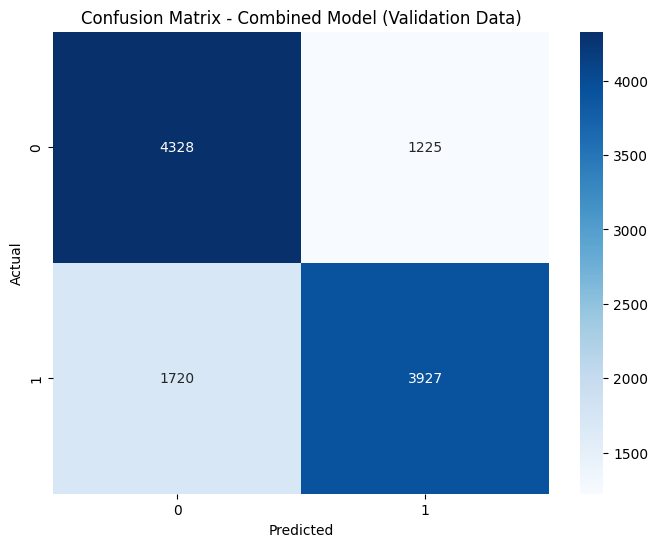

False Negative Percentage for Combined Model (Validation Data): 30.46%
Accuracy for Combined Model (Validation Data):  0.7370535714285714
Precision for Combined Model (Validation Data):  0.7391139998798433
Recall for Combined Model (Validation Data):  0.7370535714285714
F1 Score for Combined Model (Validation Data):  0.7366369535721684


In [24]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the function to calculate false negative percentage
def calculate_false_negative(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp) * 100

# Combine predictions using majority voting
combined_val_predictions = []
for p1, p2, p3, p4 in zip(val_predictions1, val_predictions2, val_predictions3, val_predictions4):
    votes = Counter([p1, p2, p3, p4])
    combined_val_predictions.append(votes.most_common(1)[0][0])

# Plot confusion matrix for the combined model
cm_combined = confusion_matrix(y_val, combined_val_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Combined Model (Validation Data)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print the false negative percentage for the combined model
false_negative_percentage_combined = calculate_false_negative(y_val, combined_val_predictions)
print(f"False Negative Percentage for Combined Model (Validation Data): {false_negative_percentage_combined:.2f}%")

# Calculate metrics for the combined model
accuracy_combined = accuracy_score(y_val, combined_val_predictions)
precision_combined = precision_score(y_val, combined_val_predictions, average='weighted')
recall_combined = recall_score(y_val, combined_val_predictions, average='weighted')
f1_combined = f1_score(y_val, combined_val_predictions, average='weighted')

# Print metrics for the combined model
print("Accuracy for Combined Model (Validation Data): ", accuracy_combined)
print("Precision for Combined Model (Validation Data): ", precision_combined)
print("Recall for Combined Model (Validation Data): ", recall_combined)
print("F1 Score for Combined Model (Validation Data): ", f1_combined)


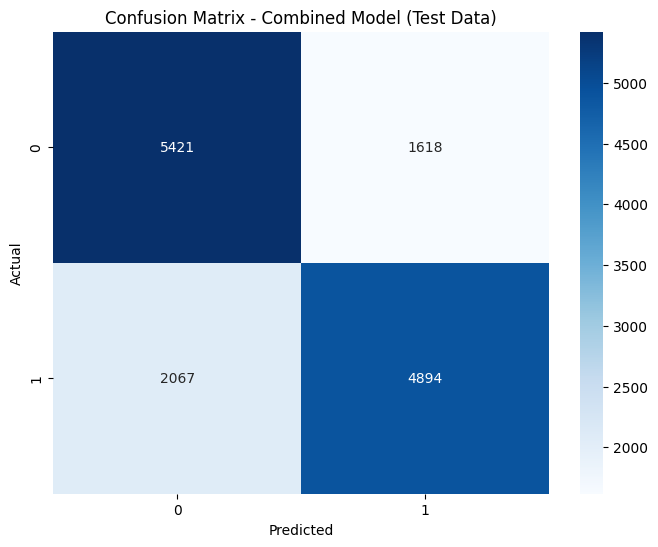

False Negative Percentage for Combined Model (Test Data): 29.69%
Accuracy for Combined Model (Test Data):  0.7367857142857143
Precision for Combined Model (Test Data):  0.7376701574748451
Recall for Combined Model (Test Data):  0.7367857142857143
F1 Score for Combined Model (Test Data):  0.7364674952419114


In [25]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the function to calculate false negative percentage
def calculate_false_negative(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp) * 100

# Combine predictions using majority voting
combined_test_predictions = []
for p1, p2, p3, p4 in zip(test_predictions1, test_predictions2, test_predictions3, test_predictions4):
    votes = Counter([p1, p2, p3, p4])
    combined_test_predictions.append(votes.most_common(1)[0][0])

# Plot confusion matrix for the combined model
cm_combined = confusion_matrix(y_test, combined_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Combined Model (Test Data)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print the false negative percentage for the combined model
false_negative_percentage_combined = calculate_false_negative(y_test, combined_test_predictions)
print(f"False Negative Percentage for Combined Model (Test Data): {false_negative_percentage_combined:.2f}%")

# Calculate metrics for the combined model
accuracy_combined = accuracy_score(y_test, combined_test_predictions)
precision_combined = precision_score(y_test, combined_test_predictions, average='weighted')
recall_combined = recall_score(y_test, combined_test_predictions, average='weighted')
f1_combined = f1_score(y_test, combined_test_predictions, average='weighted')

# Print metrics for the combined model
print("Accuracy for Combined Model (Test Data): ", accuracy_combined)
print("Precision for Combined Model (Test Data): ", precision_combined)
print("Recall for Combined Model (Test Data): ", recall_combined)
print("F1 Score for Combined Model (Test Data): ", f1_combined)
